# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [48]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [49]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:50]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (# Step 1)
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = requests.get(url).json()
        
        # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request

        # Step 5: Extraction
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        #city_pressure = data.get("main", {}).get("pressure")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          #"Pressure": city_pressure
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | zhumysker
Processing Record 3 of Set 1 | aroma
Processing Record 4 of Set 1 | tranovaho
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | nemuro
Processing Record 7 of Set 1 | karratha
Processing Record 8 of Set 1 | vega de alatorre
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | montrose
Processing Record 12 of Set 1 | yima
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | taiohae
Processing Record 15 of Set 1 | poltavka
Processing Record 16 of Set 1 | badger
Processing Record 17 of Set 1 | kargopol'
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | san jose del guaviare
Processing Record 22 of Set 1 | college
Processing Record 23 of Set 1

In [50]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          50
Lat           48
Lng           48
Max Temp      48
Humidity      48
Cloudiness    48
Wind Speed    48
Country       48
Date          48
dtype: int64

In [51]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,69.78,56.0,83.0,16.58,AU,1.717560e+09
1,zhumysker,49.3333,49.4000,79.05,56.0,73.0,5.26,KZ,1.717560e+09
2,aroma,15.8167,36.1333,94.75,19.0,73.0,4.32,SD,1.717560e+09
3,tranovaho,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,jamestown,42.0970,-79.2353,73.04,73.0,0.0,4.61,US,1.717560e+09


In [56]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,69.78,56.0,83.0,16.58,AU,1.717560e+09
1,zhumysker,49.3333,49.4000,79.05,56.0,73.0,5.26,KZ,1.717560e+09
2,aroma,15.8167,36.1333,94.75,19.0,73.0,4.32,SD,1.717560e+09
3,tranovaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,jamestown,42.0970,-79.2353,73.04,73.0,0.0,4.61,US,1.717560e+09


In [58]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        50 non-null     object 
 1   Lat         48 non-null     float64
 2   Lng         48 non-null     float64
 3   Max Temp    48 non-null     float64
 4   Humidity    48 non-null     float64
 5   Cloudiness  48 non-null     float64
 6   Wind Speed  48 non-null     float64
 7   Country     48 non-null     object 
 8   Date        48 non-null     float64
dtypes: float64(7), object(2)
memory usage: 3.9+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

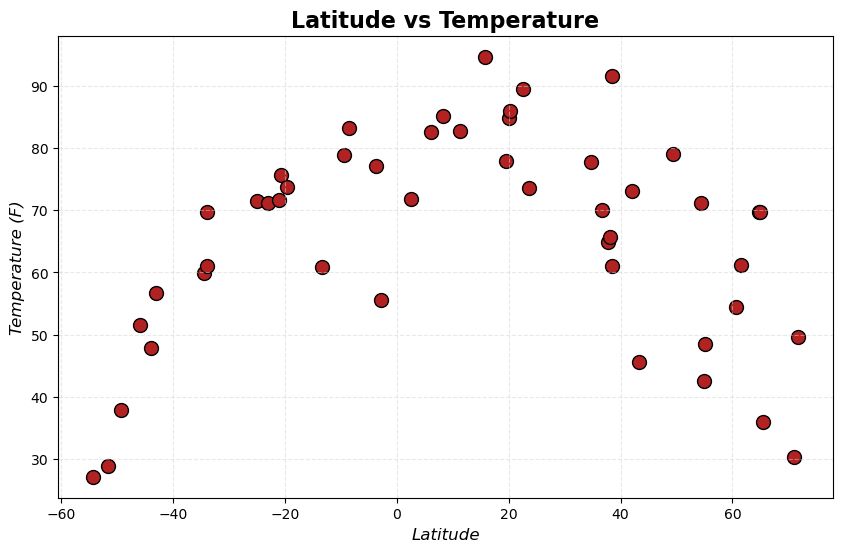

In [60]:
# Build scatter plot for latitude vs. temperature
# scatter latitude vs temperature

# Step 1: Get the Data
x = city_data_df.Lat
y = city_data_df['Max Temp']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("./output_data/Fig1.png")

# Step 5: Show/Save the graph
plt.show()


#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE